# Prosjekt i PY1010
## Support Dashboard

Analyser av data som er loggført for supportavdelingen i telefonselskapet MORSE

In [1]:
# Oppgave del A

import pandas as pd
import numpy as np

# Les inn Excel-filen
filnavn = "support_uke_24.xlsx"
df = pd.read_excel(filnavn)

# Konverter hver kolonne til numpy-arrays
u_dag = np.array(df.iloc[:, 0])       # Ukedag
kl_slett = np.array(df.iloc[:, 1])    # Klokkeslett
varighet = np.array(df.iloc[:, 2])    # Samtalens varighet
score = np.array(df.iloc[:, 3])       # Kundens tilfredshet

# Skriv ut de første radene som sjekk
print("Første 5 rader i datasettet:")
print(df.head())



Første 5 rader i datasettet:
   Ukedag Klokkeslett  Varighet  Tilfredshet
0  Mandag    08:04:16  00:07:12          NaN
1  Mandag    08:04:53  00:02:49          6.0
2  Mandag    08:06:31  00:08:36          NaN
3  Mandag    08:11:21  00:04:34          NaN
4  Mandag    08:20:46  00:07:38          NaN


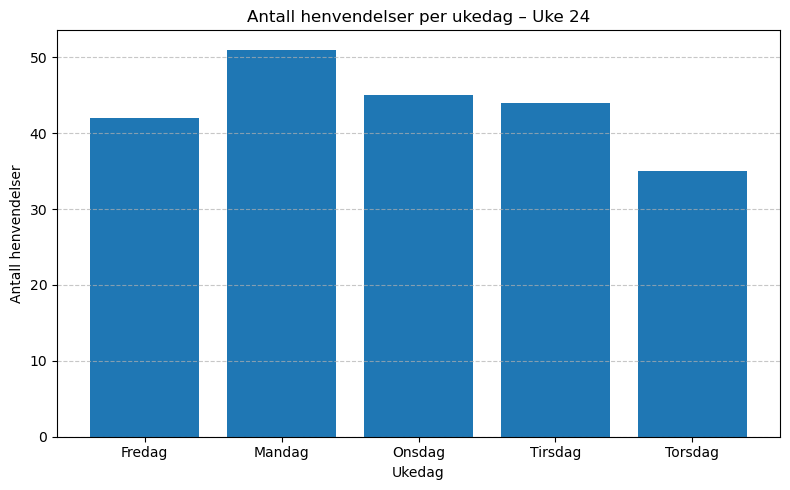

In [3]:
# Oppgave del B

import matplotlib.pyplot as plt

# Tell hvor mange ganger hver ukedag forekommer
ukedag_telling = pd.Series(u_dag).value_counts().sort_index()

# Visualiser med stolpediagram
plt.figure(figsize=(8, 5))
plt.bar(ukedag_telling.index, ukedag_telling.values)
plt.title("Antall henvendelser per ukedag – Uke 24")
plt.xlabel("Ukedag")
plt.ylabel("Antall henvendelser")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [5]:
# Oppgave del C

import datetime as dt

# Konverter varigheter fra tekst til timedelta-objekter
varighet_td = [dt.datetime.strptime(tid, "%H:%M:%S") - dt.datetime(1900, 1, 1) for tid in varighet]

# Finn korteste og lengste varighet
korteste = min(varighet_td)
lengste = max(varighet_td)

# Skriv ut resultatet
print(f"Korteste samtaletid i uke 24 var: {korteste}")
print(f"Lengste samtaletid i uke 24 var: {lengste}")


Korteste samtaletid i uke 24 var: 0:00:59
Lengste samtaletid i uke 24 var: 0:11:28


In [7]:
# Oppgave del D

import datetime as dt

# Konverter varigheter fra tekst til timedelta-objekter
varighet_td = [dt.datetime.strptime(tid, "%H:%M:%S") - dt.datetime(1900, 1, 1) for tid in varighet]

# Regn ut total varighet
total_tid = sum(varighet_td, dt.timedelta())

# Antall samtaler
antall_samtaler = len(varighet_td)

# Gjennomsnittlig varighet
gjennomsnitt = total_tid / antall_samtaler

# Avrund til nærmeste sekund
gjennomsnitt_rundet = dt.timedelta(seconds=int(gjennomsnitt.total_seconds()))

# Skriv ut resultat
print(f"Gjennomsnittlig samtaletid i uke 24 var: {gjennomsnitt_rundet}")



Gjennomsnittlig samtaletid i uke 24 var: 0:06:40


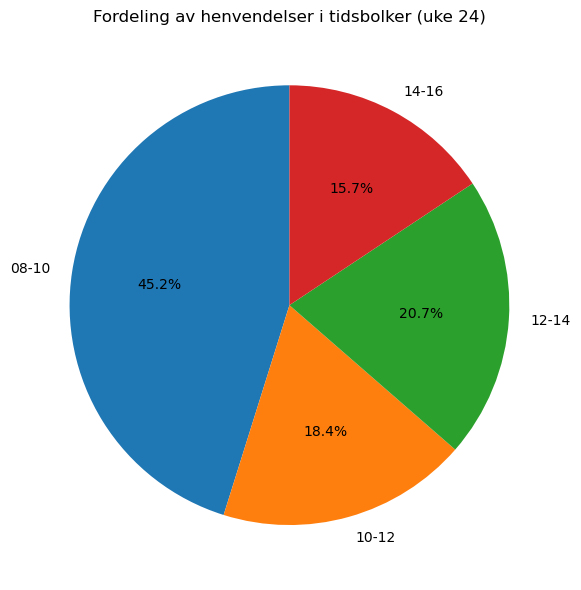

In [9]:
# Oppgave del E

import matplotlib.pyplot as plt
from datetime import time

# Konverter klokkeslett fra tekst til datetime.time-objekter
klokkeslett_tid = [dt.datetime.strptime(tid, "%H:%M:%S").time() for tid in kl_slett]

# Funksjon for å bestemme hvilken tidsbolk klokkeslettet tilhører
def finn_bolk(tid):
    if time(8, 0) <= tid < time(10, 0):
        return "08-10"
    elif time(10, 0) <= tid < time(12, 0):
        return "10-12"
    elif time(12, 0) <= tid < time(14, 0):
        return "12-14"
    elif time(14, 0) <= tid < time(16, 0):
        return "14-16"
    else:
        return "Utenfor vakt"

# Lag en liste med hvilken bolk hver henvendelse havner i
tidsbolker = [finn_bolk(tid) for tid in klokkeslett_tid]

# Tell antall i hver bolk (utelater de som havner "utenfor vakt")
from collections import Counter
bolk_telling = Counter(tidsbolker)
if "Utenfor vakt" in bolk_telling:
    del bolk_telling["Utenfor vakt"]

# Tegn kakediagram
plt.figure(figsize=(6, 6))
plt.pie(bolk_telling.values(), labels=bolk_telling.keys(), autopct="%1.1f%%", startangle=90)
plt.title("Fordeling av henvendelser i tidsbolker (uke 24)")
plt.tight_layout()
plt.show()


In [11]:
# Oppgave del F
# Kunder som ikke oppga tilfredshet ble utelatt fra NPS-beregningen i tråd med oppgaveteksten

import math

# Filtrer ut de som har gitt score (altså ikke NaN)
gyldige_scores = [s for s in score if not (pd.isna(s) or math.isnan(s))]

# Tell antall i hver kategori
antall_total = len(gyldige_scores)
antall_positive = sum(1 for s in gyldige_scores if s >= 9)
antall_nøytrale = sum(1 for s in gyldige_scores if 7 <= s <= 8)
antall_negative = sum(1 for s in gyldige_scores if s <= 6)

# Prosentregning
prosent_positive = 100 * antall_positive / antall_total
prosent_negative = 100 * antall_negative / antall_total

# NPS beregning
nps = prosent_positive - prosent_negative

# Skriv ut resultat
print("NPS-beregning for uke 24:\n")
print("Score 1–6: Negativ (kunden vil trolig ikke anbefale MORSE til andre)")
print("Score 7–8: Nøytral")
print("Score 9–10: Positiv (kunden vil trolig anbefale MORSE til andre)\n")

print(f"Antall kunder som ga tilbakemelding: {antall_total}")
print(f"Positive kunder: {antall_positive} ({prosent_positive:.1f}%)")
print(f"Negative kunder: {antall_negative} ({prosent_negative:.1f}%)")
print(f"Net Promoter Score (NPS): {nps:.1f}")



NPS-beregning for uke 24:

Score 1–6: Negativ (kunden vil trolig ikke anbefale MORSE til andre)
Score 7–8: Nøytral
Score 9–10: Positiv (kunden vil trolig anbefale MORSE til andre)

Antall kunder som ga tilbakemelding: 43
Positive kunder: 28 (65.1%)
Negative kunder: 10 (23.3%)
Net Promoter Score (NPS): 41.9


### Tolkning:
En NPS på **41.9** indikerer at en stor andel av kundene er fornøyde og lojale. Dette er et sterkt resultat og viser at supportavdelingen gir en god kundeopplevelse.

| NPS-verdi    | Tolkning                  |
|--------------|----------------------------|
| < 0          | Svakt – mange misfornøyde  |
| 0–30         | OK – forbedringspotensial  |
| 30–70        | Bra – mange fornøyde       |
| 70+          | Svært bra – lojal kundebase |

## Test og kvalitetssikring

Koden er testet trinnvis i Jupyter Notebook for hver del (A–F), og fungerer som forventet. Koden er kjørbar for mottaker forutsatt at:

- Filen `support_uke_24.xlsx` ligger i samme mappe som notebooken
- Bibliotekene `pandas`, `numpy`, `matplotlib` og `datetime` er installert

Alle funksjoner er validert mot datasettet og gir korrekte og forklarte resultater i henhold til oppgaveteksten.
